Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers

#Check if tensorflow sees GPU
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())



#  ___ ___ ___  ___ _      _   ___ __  __ ___ ___  
# |   \_ _/ __|/ __| |    /_\ |_ _|  \/  | __| _ \ 
# | |) | |\__ \ (__| |__ / _ \ | || |\/| | _||   /
# |___/___|___/\___|____/_/ \_\___|_|  |_|___|_|_\
#                                                
# The ouputs in this notebook differs from the report. When exporting the code to jupyter
# the code had to be re-run, resulting in slighlty different outputs due to randomness.

                                                                       

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


**Preprocessing**

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)

In [4]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8418 - accuracy: 0.7583 - val_loss: 0.2536 - val_accuracy: 0.9267
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.9271 - val_loss: 0.1936 - val_accuracy: 0.9406
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1846 - accuracy: 0.9460 - val_loss: 0.1593 - val_accuracy: 0.9529
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1548 - accuracy: 0.9524 - val_loss: 0.1333 - val_accuracy: 0.9588
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9624 - val_loss: 0.1232 - val_accuracy: 0.9633
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9672 - val_loss: 0.1077 - val_accuracy: 0.9691
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9723 - val_loss: 0.1093 - val_accuracy: 0.9663
Epoch 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


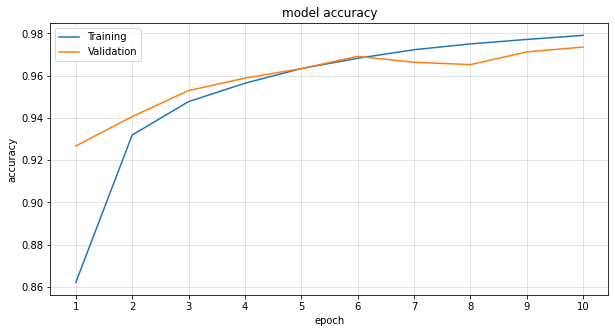

In [5]:
import numpy as np

#Model summary
print(model.summary())

#Accuracy plot
plt.figure(figsize=(10,5))
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.xticks(np.arange(len(fit_info.history['accuracy'])), np.arange(1, len(fit_info.history['accuracy'])+1))
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.1)
plt.show()


**Question 2D**

In [6]:
#2D
from tensorflow.keras import regularizers

epochs = 40

#train network on different reg_factors
def run_model(factor):
    ## Define model ##
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(factor)))
    model.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(factor)))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.SGD(lr = 0.1),
            metrics=['accuracy'],)

    fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    return score[1] #Return val_accuracy


#Factors used
factors = [0.001, 0.0005, 0.0001, 0.00001, 0.000001]

#Run model, three times for each factor
accuracy=[]
c = 1
for f in factors:
    a = []
    for r in range(3):
        print("Factor: {} Model: {}/15".format(f, c))
        a.append(run_model(f))
        c += 1
    accuracy.append(a)


Factor: 0.001 Model: 1/15
Test loss: 0.11912041902542114, Test accuracy 0.9818000197410583
Factor: 0.001 Model: 2/15
Test loss: 0.12219473719596863, Test accuracy 0.9789999723434448
Factor: 0.001 Model: 3/15
Test loss: 0.12075633555650711, Test accuracy 0.9804999828338623
Factor: 0.0005 Model: 4/15
Test loss: 0.11130862683057785, Test accuracy 0.9821000099182129
Factor: 0.0005 Model: 5/15
Test loss: 0.10788845270872116, Test accuracy 0.9819999933242798
Factor: 0.0005 Model: 6/15
Test loss: 0.10670977830886841, Test accuracy 0.9829999804496765
Factor: 0.0001 Model: 7/15
Test loss: 0.11920920759439468, Test accuracy 0.9822999835014343
Factor: 0.0001 Model: 8/15
Test loss: 0.11862225085496902, Test accuracy 0.983299970626831
Factor: 0.0001 Model: 9/15
Test loss: 0.11833970993757248, Test accuracy 0.9829999804496765
Factor: 1e-05 Model: 10/15
Test loss: 0.07579561322927475, Test accuracy 0.9811000227928162
Factor: 1e-05 Model: 11/15
Test loss: 0.07801204174757004, Test accuracy 0.981599986

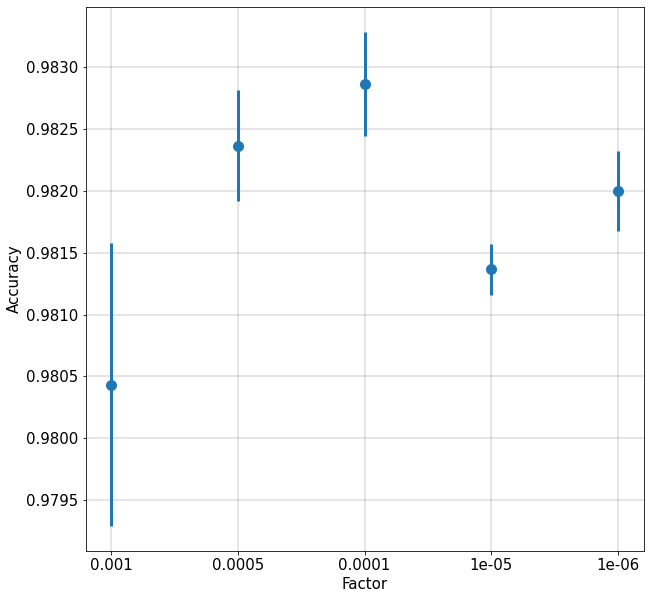

In [7]:
#Calculate mean and std
acc_means = []
acc_stds = []
for f in accuracy:
    acc_means.append(np.mean(f))
    acc_stds.append(np.std(f))

#Plot result
plt.figure(figsize=(10,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Factor', fontsize=15)
plt.grid(color='black', linestyle='-', linewidth=2, alpha=0.1)
plt.errorbar(list(map(str, factors)), acc_means, yerr=acc_stds, linestyle='none', marker='o', linewidth=3, markersize=10)
plt.show()

**Question 3**

In [8]:
#Model with convolutional layers and pooling.
epochs = 30

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.7880 - accuracy: 0.7567 - val_loss: 0.1204 - val_accuracy: 0.9649
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0959 - accuracy: 0.9739 - val_loss: 0.0611 - val_accuracy: 0.9845
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0658 - accuracy: 0.9828 - val_loss: 0.0526 - val_accuracy: 0.9854
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0535 - accuracy: 0.9865 - val_loss: 0.0497 - val_accuracy: 0.9872
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0429 - accuracy: 0.9898 - val_loss: 0.0511 - val_accuracy: 0.9858
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9917 - val_loss: 0.0430 - val_accuracy: 0.9895
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0320 - accuracy: 0.9930 - val_loss: 0.0403 - val_accuracy: 0.9903
Epoch 

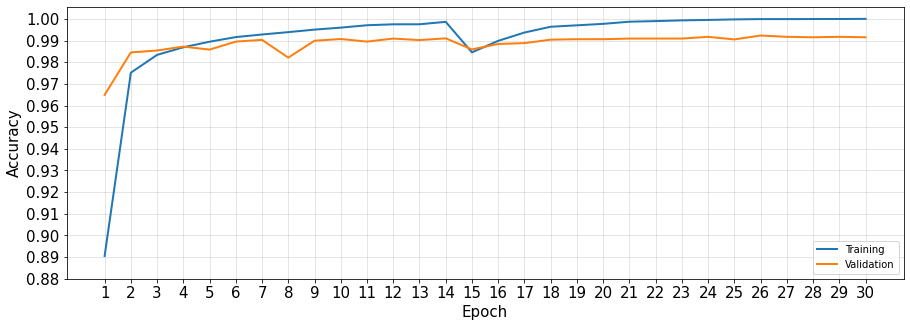

In [9]:
#Plot accuracy during training
plt.figure(figsize=(15,5))
plt.plot(fit_info.history['accuracy'], linewidth=2)
plt.plot(fit_info.history['val_accuracy'], linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend(['Training', 'Validation'], loc='lower right')
plt.xticks(np.arange(len(fit_info.history['accuracy'])), np.arange(1, len(fit_info.history['accuracy'])+1))
plt.yticks(np.arange(0.88, 1.01, 0.01))
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.1)
plt.show()

### Question 4) Auto-Encoder for denoising

In [10]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)

In [11]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))

Epoch 1/32
938/938 [==============================] - 2s 2ms/step - loss: 0.2406 - val_loss: 0.1527
Epoch 2/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1492 - val_loss: 0.1410
Epoch 3/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1379 - val_loss: 0.1325
Epoch 4/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1319 - val_loss: 0.1301
Epoch 5/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1281 - val_loss: 0.1278
Epoch 6/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1259 - val_loss: 0.1258
Epoch 7/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1243 - val_loss: 0.1249
Epoch 8/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1226 - val_loss: 0.1246
Epoch 9/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1216 - val_loss: 0.1226
Epoch 10/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1208 - val_loss: 0.1235

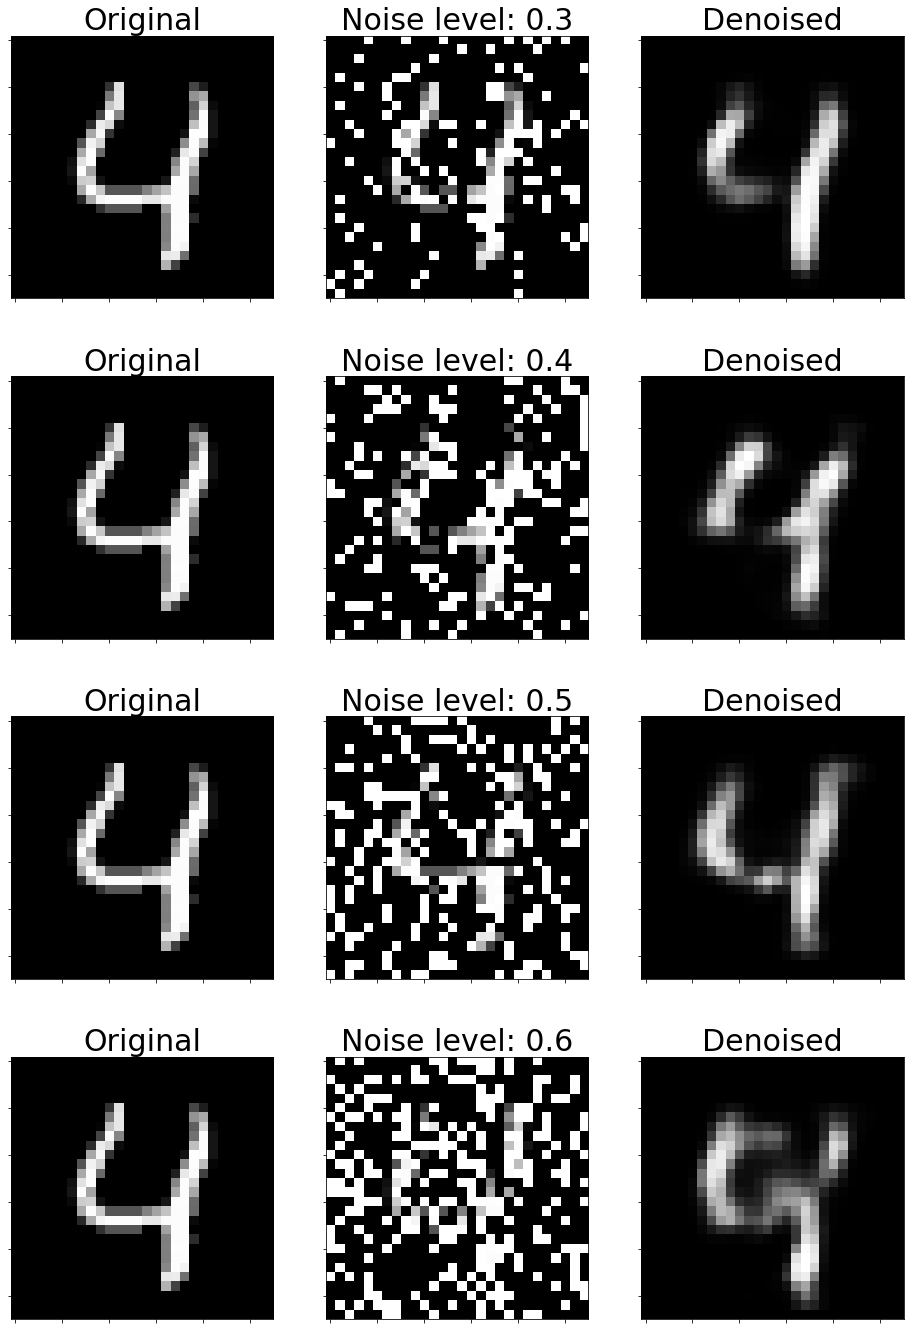

In [17]:
#4B
#Plot different noice digits before and after denosing  
def plot_diff_noice(numbers):
    fig, axs = plt.subplots(4, 3, figsize=(16,24))
    #axs = axs.ravel()
    
    for i,rows in enumerate(axs):
        for j in range(3):
            rows[j].imshow(numbers[i][j].reshape(28,28), cmap='gray')
            rows[j].xaxis.set_ticklabels([])
            rows[j].yaxis.set_ticklabels([])
        rows[0].set_title('Original', fontsize=30)
        rows[1].set_title('Noise level: {}'.format(numbers[i][3]), fontsize=30)
        rows[2].set_title('Denoised', fontsize=30)
    plt.show()

#Noise levels used
diff = [0.3, 0.4, 0.5, 0.6]
                                        
data = [] 
original = flattened_x_test[4]
for d in diff:
    noiced = salt_and_pepper(original, noise_level=d).reshape(-1,784)
    denoiced = autoencoder.predict(noiced)
    data.append([original, noiced, denoiced, d])
plot_diff_noice(data)

In [18]:
#4C)
# model from q3
def best_model(x_train, y_train, x_test, y_test):
    epochs = 20

    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(0.00001)))
    model.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(0.00001)))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.SGD(lr = 0.1),
            metrics=['accuracy'],)

    fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    return score[1]

#Noise levels used
noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#Run model on all noise levels
res = []
for level in noise_levels:
    x_train_decoded = autoencoder.predict(salt_and_pepper(x_train.reshape(-1,784), noise_level=level)).reshape(60000,28,28,1)
    x_test_decoded = autoencoder.predict(salt_and_pepper(x_test.reshape(-1,784), noise_level=level)).reshape(10000,28,28,1)
    print(level)
    res.append(best_model(x_train_decoded, y_train, x_test_decoded, y_test))

#Print result
for i, n in enumerate(noise_levels):
    print('Noise: {}  Acc: {}'.format(n, res[i]))



0.0
Test loss: 0.09916096180677414, Test accuracy 0.9782999753952026
0.1
Test loss: 0.11813882738351822, Test accuracy 0.972100019454956
0.2
Test loss: 0.15397381782531738, Test accuracy 0.9635999798774719
0.3
Test loss: 0.17570744454860687, Test accuracy 0.9527999758720398
0.4
Test loss: 0.29175689816474915, Test accuracy 0.9225999712944031
0.5
Test loss: 0.4351673424243927, Test accuracy 0.8788999915122986
0.6
Test loss: 0.7991529703140259, Test accuracy 0.7718999981880188
0.7
Test loss: 1.3732316493988037, Test accuracy 0.5921000242233276
0.8
Test loss: 1.9385902881622314, Test accuracy 0.38589999079704285
0.9
Test loss: 2.2953014373779297, Test accuracy 0.19089999794960022
1.0
Test loss: 2.325298309326172, Test accuracy 0.1014999970793724
Noise: 0.0  Acc: 0.9782999753952026
Noise: 0.1  Acc: 0.972100019454956
Noise: 0.2  Acc: 0.9635999798774719
Noise: 0.3  Acc: 0.9527999758720398
Noise: 0.4  Acc: 0.9225999712944031
Noise: 0.5  Acc: 0.8788999915122986
Noise: 0.6  Acc: 0.7718999981880

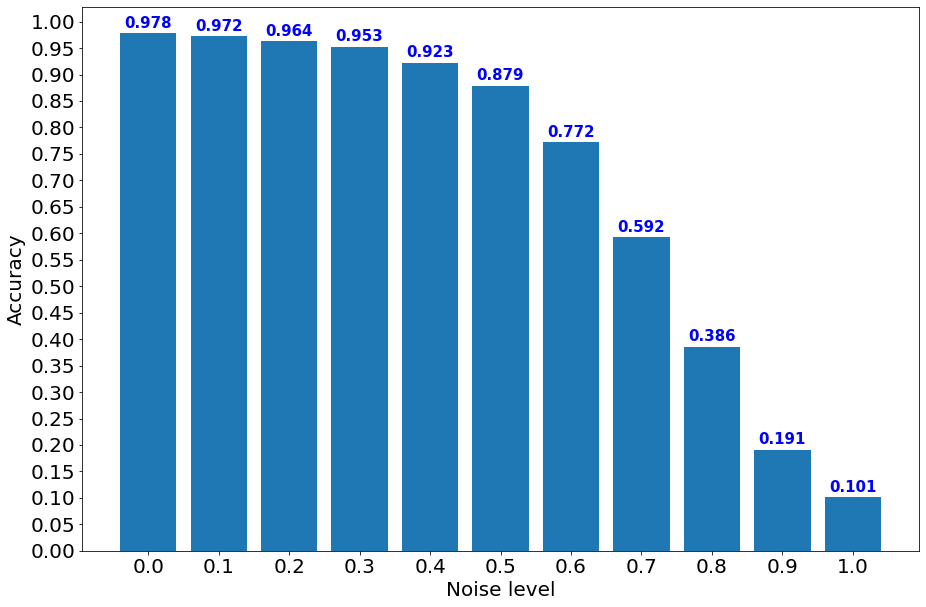

In [19]:
#Plot accuracy of noice_levels
plt.figure(figsize=(15,10))
plt.bar(list(map(str, noise_levels)), res)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Noise level', fontsize=20)

for i, v in enumerate(res):
    plt.text(i-0.34, v+0.01, str(round(v,3)), color='blue', fontweight='bold',fontsize=15)
plt.show()


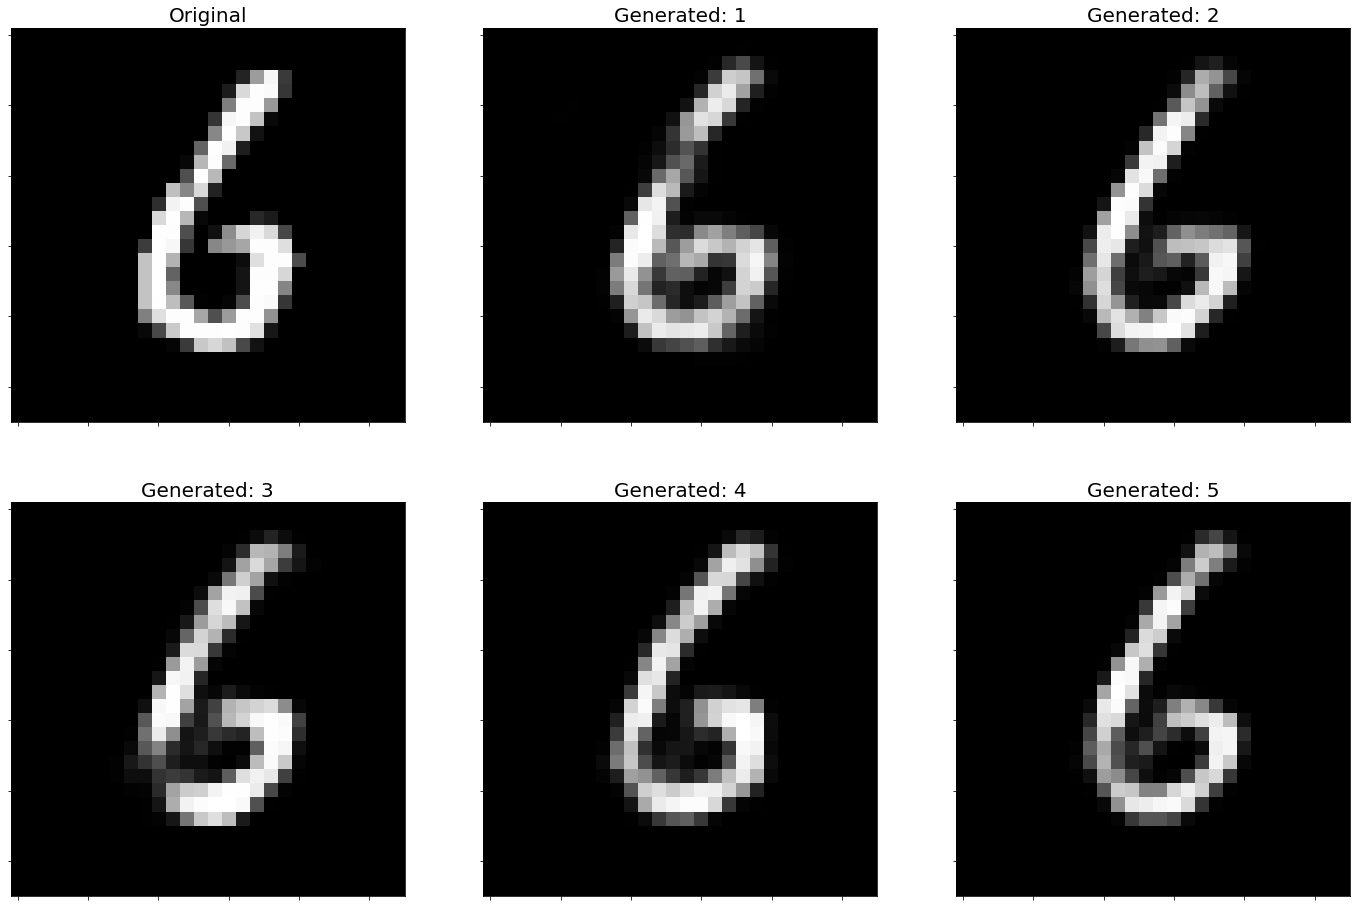

In [20]:
#Plot generated numbers
def plot_new_numbers(num):
    numbers = []
    for n in num:
        numbers.append(n.reshape(28,28))

    fig, axs = plt.subplots(2, 3, figsize=(24,16))
    axs = axs.ravel()
    
    for i, number in enumerate(numbers):
        if i == 0:
            axs[i].imshow(number, cmap='gray')
            axs[i].set_title('Original', fontsize=20)
        else:
            axs[i].imshow(number, cmap='gray')
            axs[i].set_title('Generated: {}'.format(i), fontsize=20)
        axs[i].xaxis.set_ticklabels([])
        axs[i].yaxis.set_ticklabels([])

    plt.show()

#Creats 5 "new" numbers
original = flattened_x_test[50]
new_numbers = []
new_numbers.append(original)
for i in range(5):
    enc = encoder_only.predict(original.reshape(-1,784))
    enc = salt_and_pepper(enc, noise_level=0.2)
    dec = decoder.predict(enc)
    new_numbers.append(dec)
plot_new_numbers(new_numbers)